# Пособие по использованию блока advanced_functions

## Оглавление

1. [__Функция slicer__](#Функция-slicer) Создание списка индексов
    - [Обязательные параметры:](#Обязательные-параметры:)
    - [Необязательные параметры:](#Необязательные-параметры:)
    
    
2. [__Функция sorting__](#Функция-sorting) Сортировка GroupVar'ов
    - [Обязательные параметры:](#Обязательные-параметры:)
    
    
3. [__Функция smoothing__](#Функция-smoothing) Строит "сглаженную" функцию через заданные точки.
    - [Обязательные параметры:](#Обязательные-параметры)
    
    
4. [__Функции fmin и fmax__](#Функции-fmin-и-fmax) Ищет точки экстремума.
    - [Обязательные параметры:](#Обязательные-параметры)
    - [Необязательные параметры:](#Необязательные-параметры)


5. [__Функция curve_fit__](#Функция-curve_fit) Аппроксимирует любую прямую к заданным точкам.
    - [Обязательные параметры:](#Обязательные-параметры)
    
    
6. [__Функция sigma__](#Функция-sigma) Считает отклонение точек от массива.
    - [Обязательные параметры:](#Обязательные-параметры)

Данное пособие поможет вам ознакомиться с дополнительным функционалом lab_cheat. 

__Важное замечание!__ Функции данного блока не импортируются при `from lab_cheat import *`, используйте 
`from lab_cheat.advanced_functions import ФУНКЦИЯ`.

## Функция slicer

Данная функция создаёт список индексов переменных, лежащих в заданном промежутке, исключая точки, наиблизжайшие к значениям из чёрного списка, может быть использована для исключения _плохих_ измерений.

### Обязательные параметры (slicer):

- __varc__ - GroupVar с переменными, в котором нужно отсечь часть

### Необязательные параметры (slicer):

- __left_val__ - Левая граница, если не передана, то $-\infty$
- __right_val__ - Правая граница, если не передана, то $+\infty$

### Выходящие данные (slicer):

Выводит список с индексами элементов, удовлетворящих условиям среза.


In [3]:
from lab_cheat import *
from lab_cheat.advanced_functions import slicer
v = GroupVar(range(10), 0)
s = slicer(v, left_val=1.1, right_val=8, excluding=[3.1, 6.3, 0])
v[s].val()

[2.0, 4.0, 5.0, 7.0, 8.0]

## Функция sorting

Данная функция сортирует 2 GroupVar попарно, сохраняя соответствия между точками. Сортирует по абсциссам.

### Обязательные параметры (sorting):

- __x__ - Итерируемый объект с абсциссами точек
- __y__ - Итерируемый объект с ординатами точек

### Выходящие данные (sorting):

Кортеж с итерируемыми объектами (__x__, __y__)

In [1]:
from lab_cheat import *
from lab_cheat.advanced_functions import sorting
x = GroupVar([1, 5, 2, 4], 0)
y = GroupVar([1, 2, 3, 4], 0)
sorting(x, y)

(['~1.0', '~2.0', '~4.0', '~5.0'], ['~1.0', '~3.0', '~4.0', '~2.0'])

## Функция smoothing

Данная функция строит "сглаженную" функцию через заданные точки.


### Обязательные параметры

- __x__ - Итерируемый объект с абсциссами точек
- __y__ - Итерируемый объект с ординатами точек
- __smooth_factor__ - как сильно функция будет стараться быть "гладкой"

### Входящие данные (smoothing)

Список координат точек по осям __x__ и __y__


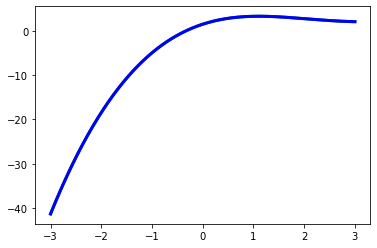

In [14]:
from lab_cheat import *
import numpy as np
from lab_cheat.advanced_functions import smoothing
import matplotlib.pyplot as plt
x = GroupVar([13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], 0)
y = GroupVar([2.404070, 1.588134, 1.760112, 1.771360, 1.860087,
          1.955789, 1.910408, 1.655911, 1.778952, 2.624719,
          1.698099, 3.022607, 3.303135], 0)
f = smoothing(x, y, 0.5)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, f(xs), 'g', lw=3)
plt.plot(xs, f(xs), 'b', lw=3)
plt.show()

## Функции fmin и fmax

Функции проводит аккуратный поиск минимума и, соответственно, максимума заданной функции. Работают аналогично друг другу.

### Обязательные параметры

- __f__ - функция для поиска минимума или максимума
- __x0__ - точка рядом с минимумом или максимумом

### Необязательные параметры

- __x__ - абсциссы точек возле минимума или максимума
- __y__ - абсциссы точек возле минимума или максимума

### Выходящие данные

Абсцисса точки минимума функции.

In [23]:
from lab_cheat import *
from lab_cheat.advanced_functions import fmin
fmin(lambda x: - x**(2) + x**(3) + x**(5), 0.46)

0.48111328124999997

<div>
<img src="Images/absciss_x0.png" width="500"/>
</div>

## Функция curve_fit

Функция аппроксимирует любую прямую к заданным точкам.

### Обязательные параметры

- __f__ - функция, принимающая, помимо __x__ и другие параметры для аппроксимации
- __x__ - Итерируемый объект с координатами точек по оси абсцисс
- __y__ - Итерируемый объект с координатами точек по оси ординат
- __p0__ - Итерируемый объект с начальными значениями аппроксимируемых параметров (Их количество на 1 меньше, чем значений, принимаемых функцией f)

### Выходящие данные

Подбирает параметры __k__ и __b__ для наилучшей аппроксимации к заданным точкам.

In [40]:
from lab_cheat import *
import numpy as np
from lab_cheat.advanced_functions import curve_fit
x = GroupVar([0.3, 0.5, 2], 0)
y = GroupVar([1.2, 2.2, 4.8], 0)
p0 = np.array([2, 1])
curve_fit(lambda x, k, b: k*x + b, x, y, p0)

['~1.9729729735629473', '~0.8918918911305257']

## Функция sigma

Функция считает отклонение точек массива.

### Обязательные параметры

- __variable__ - итерируемый объект с точками

### Выходящие данные

Дисперсия данных точек.

In [42]:
from lab_cheat import *
from lab_cheat.advanced_functions import sigma
variable = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sigma(variable)

2.8722813232690143